# Example of non-linear cost


In [3]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
import numpy.random as rand
import math as m

In [4]:
def aircraftPositionSim(V: float, u: float, ht: float, Q: np.array, N: int, 
                        dt: float, init_x : np.array, ss_rate:int = 10, kappa = .1) -> np.array:
    # V, u, ht, and Q as defined in markdown above
    # N is how many timesteps you want
    # dt is how far apart each time step should be
    # init_x is the initial location of the aircraft
    # ss_rate is how many internal iterations it should do for each timestep
    going_out = np.zeros((4,N+1))
    going_out[:,0] = init_x
    curr_x = init_x.reshape(4,1)
    dt_i = dt/float(ss_rate) #internal_dt
    Q_i = Q / float(ss_rate) # internal_Q
    cholQ_i = la.cholesky(Q_i)
    for ii in range(1,N+1):
        next_x = curr_x.copy()
        for jj in range(ss_rate):
            next_x[0] += dt_i * V * m.cos(next_x[3])
            next_x[1] += dt_i * V * m.sin(next_x[3])
            next_x[2] += dt_i * kappa * (ht - next_x[2])
            next_x[3] += dt_i * u
            next_x += np.dot(cholQ_i,rand.normal(size=(4,1)))
        curr_x = next_x
        going_out[:,ii] = next_x.reshape((4))
    return going_out

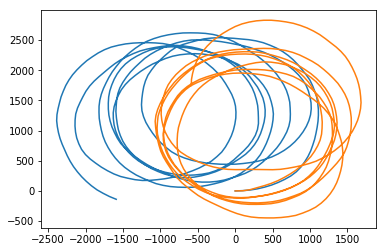

In [12]:
#Test if this works... u=5 degrees means 72 seconds to make a circle
N = 500
truth = aircraftPositionSim(100,np.radians(5),10000, np.diag([.09, .09, 1, np.radians(.1)]),
                             N,1,np.array([0.,0.,10000.,0.]))
est = aircraftPositionSim(100,np.radians(5),10000, np.diag([.09, .09, 1, np.radians(.1)]),
                             N,1,np.array([0.,0.,10000.,0.]))
plt.plot(truth[0,:],truth[1,:])
plt.plot(est[0,:],est[1,:])

In [18]:
def headingMeas(t1, t2):
    return m.atan2(t2[1]-t1[1],t2[0]-t1[0])

meas = np.zeros(N-1)
for ii in range(N-1):
    meas[ii] = headingMeas(truth[:,ii],truth[:,ii+1])

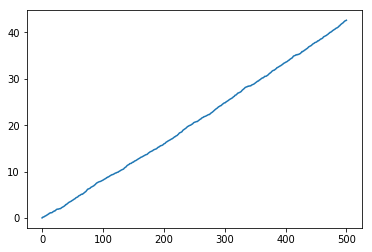

In [6]:
plt.plot(to_plot[3,:])

In [10]:
def boundAngle(input_angle: float):
    new_angle = input_angle
    if new_angle > m.pi:
        new_angle -= 2.0*m.pi
    if new_angle < -m.pi:
        new_angle += 2.0*m.pi
    return new_angle
